Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

**Загрузка датасета 1 (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)**

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print("Первые 5 строк датасета:")
print(df.head())

Первые 5 строк датасета:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


**Масштабирование sepal length (cm)**

In [3]:
scaler = StandardScaler()
df['sepal length_scaled'] = scaler.fit_transform(df[['sepal length (cm)']])

print("\nДо и после масштабирования 'sepal length (cm)':")
print(df[['sepal length (cm)', 'sepal length_scaled']].head())


До и после масштабирования 'sepal length (cm)':
   sepal length (cm)  sepal length_scaled
0                5.1            -0.900681
1                4.9            -1.143017
2                4.7            -1.385353
3                4.6            -1.506521
4                5.0            -1.021849


**Преобразование категориальных признаков в количественные способом one hot encoding для species**

In [4]:
encoder = LabelEncoder()
df['species_label'] = encoder.fit_transform(df['species'])

print("\nLabel Encoding для 'species':")
print(df[['species', 'species_label']].head())

print("\nВсе уникальные виды и их метки:")
unique_species = df[['species', 'species_label']].drop_duplicates()
print(unique_species.sort_values('species_label'))


Label Encoding для 'species':
  species  species_label
0  setosa              0
1  setosa              0
2  setosa              0
3  setosa              0
4  setosa              0

Все уникальные виды и их метки:
        species  species_label
0        setosa              0
50   versicolor              1
100   virginica              2


In [5]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_species = encoder.fit_transform(df[['species']])

encoded_df = pd.DataFrame(encoded_species,
                          columns=encoder.get_feature_names_out(['species']))

df = pd.concat([df, encoded_df], axis=1)

print("\nOne-Hot Encoding для 'species':")
print(df[['species', 'species_versicolor', 'species_virginica']].head())


print("\nВсе уникальные виды и их метки:")
unique_species_ = df[['species', 'species_versicolor', 'species_virginica']].drop_duplicates()
print(unique_species_)


One-Hot Encoding для 'species':
  species  species_versicolor  species_virginica
0  setosa                 0.0                0.0
1  setosa                 0.0                0.0
2  setosa                 0.0                0.0
3  setosa                 0.0                0.0
4  setosa                 0.0                0.0

Все уникальные виды и их метки:
        species  species_versicolor  species_virginica
0        setosa                 0.0                0.0
50   versicolor                 1.0                0.0
100   virginica                 0.0                1.0


In [6]:
print("\nИтоговый датасет:")
print(df.head())

print("\nВсе уникальные виды и их метки:")
unique_species_ = df[['species', 'species_label', 'species_versicolor', 'species_virginica']].drop_duplicates()
print(unique_species_)


Итоговый датасет:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  sepal length_scaled  species_label  species_versicolor  \
0  setosa            -0.900681              0                 0.0   
1  setosa            -1.143017              0                 0.0   
2  setosa            -1.385353              0                 0.0   
3  setosa            -1.506521              0                 0.0   
4  setosa            -1.021849              0                 0.0   

   species_virginica  
0                0.0  
1                0.0  
2                0.0  

**Для произвольной колонки данных построить график "Ящик с усами (boxplot)"**

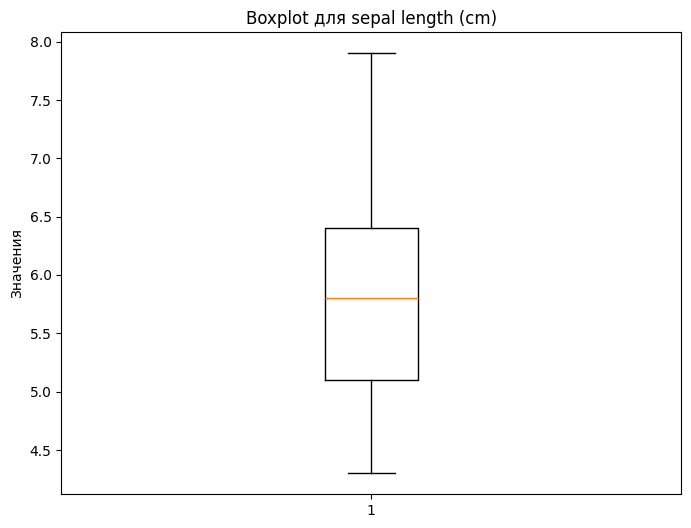

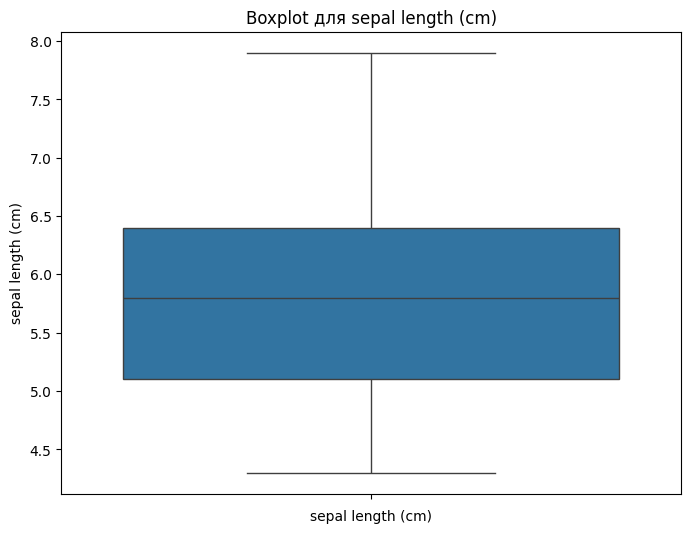

In [7]:
column_name = 'sepal length (cm)'

plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name])
plt.title(f'Boxplot для {column_name}')
plt.ylabel('Значения')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[column_name])
plt.title(f'Boxplot для {column_name}')
plt.xlabel(column_name)
plt.show()